/var/folders/87/7v73t28s4lgcqq34tmcbhmhw0000gn/T/ipykernel_11570/1448972152.py:14: FutureWarning: Use `squidpy.read.visium` instead.
  adata = sc.read_visium(
/Users/posonk/anaconda3/envs/bioInfoLab/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/posonk/anaconda3/envs/bioInfoLab/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Using library_id = Visium_FFPE_Human_Prostate_Cancer
Loaded pathology labels:
 Pathology
Invasive carcinoma       1942
Fibro-muscular tissue     820
Normal gland              777
Unknown                   611
Fibrous tissue            156
Nerve                      40
Blood vessel               17
Immune Cells                8
Name: count, dtype: int64


/var/folders/87/7v73t28s4lgcqq34tmcbhmhw0000gn/T/ipykernel_11570/1448972152.py:52: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


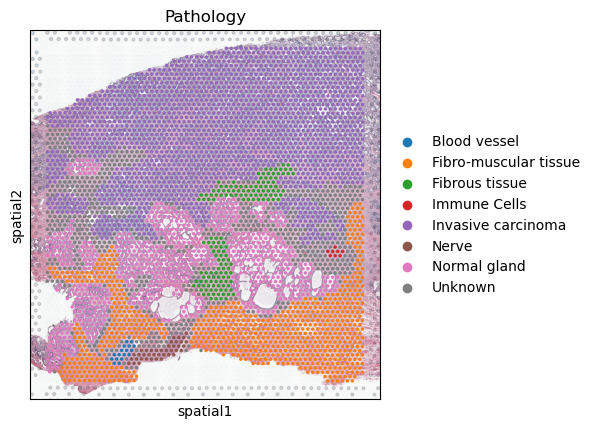

In [2]:
#!/usr/bin/env python3
# load_and_viz_prostate_fixed.py

import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

# —— User parameters ——
DATA_DIR   = "/Volumes/T7/Informatik/BioInfoLab/notebooks/data/new_data"
COUNT_FILE = "Visium_FFPE_Human_Prostate_Cancer_filtered_feature_bc_matrix.h5"
LABEL_CSV  = "/Volumes/T7/Informatik/BioInfoLab/notebooks/data/new_data/annotation_prostate_cancer.csv"

# —— 1) Read the Visium dataset ——
adata = sc.read_visium(
    path=DATA_DIR,
    count_file=COUNT_FILE,
    load_images=True
)

adata.var_names_make_unique()

# —— 2) Figure out what your library_id is ——  
lib = list(adata.uns["spatial"].keys())[0]
print("Using library_id =", lib)

# —— 3) Load & align your pathology labels ——  
labels = (
    pd.read_csv(LABEL_CSV)
      .set_index("Barcode")                   # use the CSV’s Barcode column
      .reindex(adata.obs_names)               # align to spot barcodes
)
labels["Pathology"] = labels["Pathology"].fillna("Unknown")  # fill missing
adata.obs["Pathology"] = labels["Pathology"].astype(str)      # add to AnnData

# confirm  
print("Loaded pathology labels:\n", adata.obs["Pathology"].value_counts())

# # —— 4) Compute QC metrics ——  
# adata.var["mt"] = adata.var_names.str.upper().str.startswith("MT-")
# sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

# # —— 5) QC violin plots ——  
# sc.pl.violin(
#     adata,
#     ["total_counts","n_genes_by_counts","pct_counts_mt"],
#     jitter=0.4,
#     multi_panel=True,
#     show=True
# )

# —— 6) Spatial plot with colored spots ——  
sc.pl.spatial(
    adata,
    library_id=lib,
    img_key="hires",
    color="Pathology",     # now coloring by your renamed column
    spot_size=200,
    show=True
)

# (Optional) if you also want to save a file afterward:
# plt.savefig("spatial_pathology_overlay.png", dpi=300)
